In [20]:
from bva.preprocess import get_all_videos_sequences_by_window
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
!pwd

/home/theo/code/theopanel/bva/notebooks


In [3]:
video_url = "../bva/data/video_details.csv"
clean_df = "../bva/data/clean_dataset.csv"

In [24]:
df_shots, all_videos_sequences, all_videos_targets, test_dict = get_all_videos_sequences_by_window(video_url, clean_df, 11, 5)

In [25]:
all_videos_sequences.shape

(43190, 10, 11)

In [27]:
unique, counts = np.unique(all_videos_targets, return_counts=True)
print (np.asarray((unique, counts)).T)

[['clear' '121']
 ['drive' '78']
 ['drop' '125']
 ['full_smash' '79']
 ['half_smash' '127']
 ['lift' '33']
 ['lob' '282']
 ['long_def' '18']
 ['long_serve' '23']
 ['net_kill' '13']
 ['net_shot' '278']
 ['no_hit' '41759']
 ['short_def' '185']
 ['short_serve' '69']]


(array([4.1828e+04, 2.8200e+02, 1.2100e+02, 4.0300e+02, 7.8000e+01,
        1.8500e+02, 2.0600e+02, 3.3000e+01, 1.8000e+01, 3.6000e+01]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

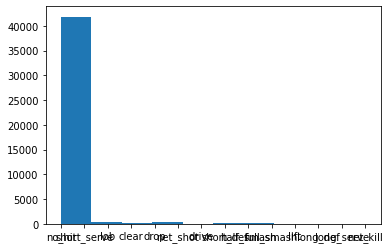

In [28]:
plt.hist(all_videos_targets)